In [1]:
# COMP5339 Week 9 Tutorial
# Material last updated: 7 Ocotber 2025
# Note materials were designed with the Roboto Condensed font, which can be installed here: https://www.1001fonts.com/roboto-condensed-font.html

from IPython.display import HTML
HTML('''
    <style> body {font-family: "Roboto Condensed Light", "Roboto Condensed";} h2 {padding: 10px 12px; background-color: #E64626; position: static; color: #ffffff; font-size: 40px;} .text_cell_render p { font-size: 15px; } .text_cell_render h1 { font-size: 30px; } h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; position: static; color: #ffffff; font-size: 20px;} h4:before{
    content: "@"; font-family:"Wingdings"; font-style:regular; margin-right: 4px;} .text_cell_render h4 {padding: 8px; font-family: "Roboto Condensed Light"; position: static; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}</style>
    <script> code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script>
    <form action="javascript:code_toggle()"><input type="submit" value="Hide/show all code."></form>
''')

# Week 9 - Connecting to an MQTT Server

This week's tutorial focusses on **retrieving data from a Publish/Subscribe messaging server**.

Up to this point, we've been looking at how we can ingest data that we've either stored in a database or locally on our machines. While this works well for single-use programs for data analytics, it isn't very useful for cases where we might want to view data that's updated on a schedule.

## 1. Data Loading

Today, we won't be using a generic dataset. Instead, we'll be accessing our data using the **COMP5339 MQTT server**.

**MQTT** stands for Message Queuing Telemetry Transport. It's a lightweight messaging protocol that's designed for devices with limited resources and unreliable networks. An MQTT server, also known as an MQTT broker, plays a central role in the MQTT architecture.

Think of it as a middleman that facilitates communication between devices. Devices that want to communicate with each other don't talk directly; instead, they send messages to the MQTT server, and the server ensures that these messages get delivered to the right place.

This setup has a few advantages. It allows for efficient communication between devices without the need for them to know each other's IP addresses. It's also great for scenarios where devices might be intermittently connected to a network because the MQTT broker can store messages until the recipient is available.

Let's start by intalling the 'paho-mqtt' package and then importing it.

In [0]:
!pip install paho-mqtt

In [2]:
import paho.mqtt.client as mqtt

### Setting up our connection

Let's start by setting up our connection.

In [3]:
# Define what happens upon connection to the server
def on_connect(client, userdata, connect_flags, reason_code, properties):
    print("Connected with result code " + str(reason_code))
    client.subscribe("COMP5339/PM2.5")

# Define what happens upon receiving a message from the server
def on_message(client, userdata, msg):
    print(f"Received message on topic {msg.topic}: {msg.payload}")

client = mqtt.Client(mqtt.CallbackAPIVersion.VERSION2)
client.on_connect = on_connect
client.on_message = on_message

# Connect to the server using the IP address and connection port
client.connect("172.17.34.107", 1883, 60)

<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In the code segment above, we define two methods that get called at specific points in our setup. We then connect to the server using the IP address and connection port.

Now, let's set up a loop to continuously run every time a message is received from the server:

In [4]:
# This loop will keep the client listening for messages
client.loop_forever()

Connected with result code Success
Received message on topic COMP5339/PM2.5: b'{"Site_Id": 798, "Date": "2024-05-22", "Hour": 6, "HourDescription": "5 am - 6 am", "Value": 3.707, "AirQualityCategory": "GOOD", "DeterminingPollutant": NaN, "Parameter.ParameterCode": "PM2.5", "Parameter.ParameterDescription": "PM2.5", "Parameter.Units": "\\u00b5g/m\\u00b3", "Parameter.UnitsDescription": "microgram per cubic meter", "Parameter.Category": "Averages", "Parameter.SubCategory": "Hourly", "Parameter.Frequency": "Hourly average", "Category": "Averages", "Subcategory": "Hourly", "Parameter": "PM2.5", "Latitude": -33.444339, "Longitude": 149.185325}'
Received message on topic COMP5339/PM2.5: b'{"Site_Id": 113, "Date": "2024-01-12", "Hour": 1, "HourDescription": "12 am - 1 am", "Value": 1.171, "AirQualityCategory": "GOOD", "ParameterCode": "PM2.5"}'
Received message on topic COMP5339/PM2.5: b'{"Site_Id": 113, "Date": "2024-01-12", "Hour": 2, "HourDescription": "1 am - 2 am", "Value": 0.253, "AirQua

KeyboardInterrupt: 

Keep this segment running for a few seconds and see how the output changes!

## 2. Visualising Data

Now that we know how to set up a connection to the server, we can use the data we collect to develop a continuous plot using the libraries we've seen in our previous tutorials.

In the following segment, finish the revised `on_message` function to produce an iterative bar plot for the PM2.5 values that updates every time a message is received from the server.

<IPython.core.display.Javascript object>


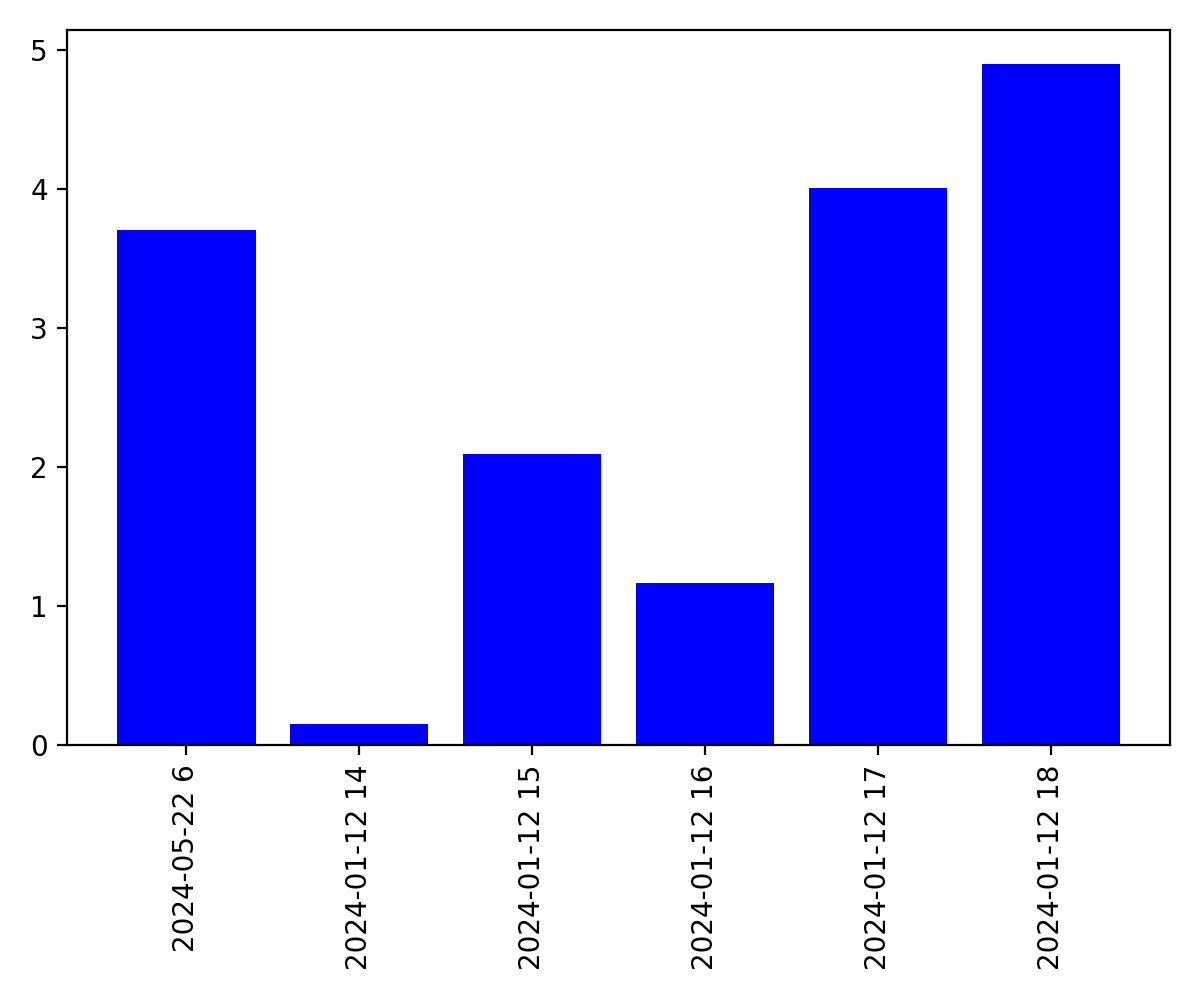

Connected with result code Success
2024-05-22 6 3.707
2024-01-12 14 0.153
2024-01-12 15 2.093
2024-01-12 16 1.1640000000000001
2024-01-12 17 4.007
2024-01-12 18 4.899


KeyboardInterrupt: 

In [5]:
# Our usual imports
import matplotlib.pyplot as plt
%matplotlib notebook # Note that this only works in Jupyter notebook version <7
import json
import paho.mqtt.client as mqtt

# Define what happens upon connection to the server
def on_connect(client, userdata, connect_flags, reason_code, properties):
    print("Connected with result code " + str(reason_code))
    client.subscribe("COMP5339/PM2.5")

client = mqtt.Client(mqtt.CallbackAPIVersion.VERSION2)
client.on_connect = on_connect

# plt.ion()
figure, ax = plt.subplots(figsize=(6, 5))
plt.xticks(rotation=90)
figure.set_tight_layout(True)
# Autoscale on unknown axis and known lims on the other
# ax.set_autoscaley_on(True)

xdata = []
ydata = []

"""
TO DO: Add your own code to this function so that rather than printing to standard output,
       the data is shown in an evolving bar plot.
"""
def on_message(client, userdata, msg):
    # print(f"Received message on topic {msg.topic}: {msg.payload.decode()}")
    js = json.loads(msg.payload)
    print(js['Date'], js['Hour'], js['Value'])
    xdata.append(js['Date'] + ' ' + str(js['Hour']))
    ydata.append(js['Value'])

    ax.bar(xdata, ydata, color='blue')
    #Need both of these in order to rescale
    # ax.relim()
    # ax.autoscale_view()
    #We need to draw
    figure.canvas.draw()
    # figure.canvas.flush_events()

# Don't edit this line. Here, we're reassigning the function that gets called upon receiving a message from the server.
client.on_message = on_message

# Connect to the server using the IP address and connection port
client.connect("172.17.34.107", 1883, 60)
client.loop_forever()

**Extension:** Try and change your chart to be interactive using `streamlit`.